# Data description

### ●  What is the general type of the data (tabular, network, geographical, textual etc.)

The data that I'm working on is about twitter account and the type of it is tabular.

# Data loading

Load data from json files.

In [1]:
import json
import glob

file_path = '/Users/siyao/Desktop/ds4d/2016-06-21/*.json'

files = [file for file in glob.glob(file_path)]
files

['/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:18:34:02.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:16:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:21:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:22:34:02.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:07:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:09:34:02.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:13:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:23:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:14:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:08:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:19:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:20:34:02.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:05:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:00:34:01.json',
 '/Users/siyao/Desktop/ds4d/2016-06-21/2016-06-21:11:34:01.json',
 '/Users/s

Include all data into a list.

In [2]:
def load_tweets(file_name):
    with open(file_name, 'r', encoding='utf-8') as f:
        tweets = (json.loads(line) for index, line in enumerate(f.readlines()))
        return tweets # # generator object
    
tweets_total = []
for file in files:
    tweets_total.extend(load_tweets(file))

How many rows of data loaded from files? 

In [3]:
print(len(tweets_total))

710637


Attribute that might use for a single twitter:
Tweet related:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
* ['id_str'] - String, unique identifier for this Tweet
* ['created_at'] - String, UTC time when this Tweet was created
* ['text'] - String, UTF-8 text of the status update.
* ['entities']['hashtags'] - list, e.g. [{'indices': [79, 86], 'text': 'Brexit'}]
* ['source'] - String, utility used to post the Tweet, as an HTML-formatted string


* ['favorite_count'] - int
* ['retweet_count'] - int
* ['quote_count'] - int
* ['reply_count'] - int

User related:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
* ['user']['id_str']
* ['user']['friends_count']
* ['user']['favourites_count']
* ['user']['followers_count']
* ['user'][statuses_count]

# Data cleaning

Extract variables that I may need from json and store them in a dataframe 'df'.

In [4]:
import pandas as pd
d = {'id_str': [], 'verified': [], 'lang': [],
       'created_at': [],'statuses_count': [],'favourites_count': [],
       'friends_count': [],'followers_count': [],'location': [], 'time_zone':[]}

for t in tweets_total:
    d['id_str'].append(t['user']['id_str'])
    d['verified'].append(t['user']['verified'])
    d['lang'].append(t['user']['lang'])
    d['created_at'].append(t['user']['created_at'])
    d['statuses_count'].append(t['user']['statuses_count'])
    d['favourites_count'].append(t['user']['favourites_count'])
    d['friends_count'].append(t['user']['friends_count'])
    d['followers_count'].append(t['user']['followers_count'])
    d['location'].append(t['user']['location'])
    d['time_zone'].append(t['user']['time_zone'])
    
    
df = pd.DataFrame(d)

df.head()

,created_at,favourites_count,followers_count,friends_count,id_str,lang,location,statuses_count,time_zone,verified
0,Wed Sep 12 14:38:59 +0000 2012,5227,5039,4137,819695353,en,"Warwickshire, England, UK",36401,London,False
1,Wed Aug 17 15:00:46 +0000 2011,4167,869,1421,356901740,en,"Mattishall, Norfolk",7532,London,False
2,Wed Mar 25 15:49:52 +0000 2009,1542,1016,1285,26522915,en,None,11247,None,False
3,Tue Oct 09 16:32:53 +0000 2012,18019,17253,263,870199693,en,intersectional feminist,112102,London,False
4,Tue May 18 16:34:06 +0000 2010,1554,264,278,145300545,en,Southern England,4868,None,False


### ●  How large and complex is it (rows/columns, size, variation, structure) 

The data is loaded from 24 json files, which have 710637 rows in total and each row has 38 variations about user account.

The original data is about each twitter object and each object has its user account data. 

Some twitters might be tweeted by a user, so the user data I extracted might be duplicated. 

After data cleaning, there were 234973 rows left.

I extracted 10 variations about twitter account that I might need from original data.

The 10 variations are 'id_str', 'verified', 'lang', 'created_at', 'statuses_count', 'favourites_count', 'friends_count', 'followers_count', 'location', 'time_zone'.

In [5]:
print(type(df['created_at'][0]))
df.describe(include='all')

<class 'str'>


,created_at,favourites_count,followers_count,friends_count,id_str,lang,location,statuses_count,time_zone,verified
count,710637,7.106370e+05,7.106370e+05,710637.000000,710637,710637,511825,7.106370e+05,432218,710637
unique,234779,NaN,NaN,NaN,234974,60,66037,NaN,263,2
top,Thu Apr 21 20:46:45 +0000 2016,NaN,NaN,NaN,723251650174017536,en,London,NaN,London,False
freq,1417,NaN,NaN,NaN,1417,575777,27820,NaN,204766,698127
mean,NaN,6.660896e+03,6.979866e+03,1361.464759,NaN,NaN,NaN,2.709380e+04,NaN,NaN
std,NaN,1.825445e+04,1.910988e+05,5106.061320,NaN,NaN,NaN,8.584004e+04,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,-1.000000,NaN,NaN,NaN,1.000000e+00,NaN,NaN
25%,NaN,1.890000e+02,1.540000e+02,202.000000,NaN,NaN,NaN,1.854000e+03,NaN,NaN
50%,NaN,1.217000e+03,4.790000e+02,531.000000,NaN,NaN,NaN,7.258000e+03,NaN,NaN
75%,NaN,5.396000e+03,1.398000e+03,1343.000000,NaN,NaN,NaN,2.388100e+04,NaN,NaN


Count how many users in total and how many twitters they tweeted on 6/21/2016 for per person.

In [6]:
from collections import Counter

id_times = list(df.id_str)
idf1 = pd.DataFrame.from_dict(Counter(id_times), orient='index')
idf1.columns = ['twitter_count']


print(idf1.describe())
idf1.head()

       twitter_count
count  234974.000000
mean        3.024322
std        10.913656
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      1417.000000


,twitter_count
819695353,18
356901740,36
26522915,6
870199693,1
145300545,88


Drop duplicated user accounts data by choosing the one which has the largest number of twitters.

In [7]:
idf2 = df.sort_values('statuses_count', ascending=False).drop_duplicates(['id_str'])
idf2 = idf2.set_index('id_str')

print(idf2.describe())
idf2.head()

       favourites_count  followers_count  friends_count  statuses_count
count      2.349740e+05     2.349740e+05  234974.000000    2.349740e+05
mean       4.374453e+03     4.660110e+03    1042.267374    1.591653e+04
std        1.420269e+04     1.422942e+05    4675.786183    4.610817e+04
min        0.000000e+00     0.000000e+00      -1.000000    1.000000e+00
25%        1.220000e+02     1.240000e+02     186.000000    1.030000e+03
50%        7.230000e+02     3.610000e+02     438.000000    4.181000e+03
75%        3.132750e+03     1.048000e+03     989.000000    1.427400e+04
max        1.530702e+06     2.826605e+07  653808.000000    6.206751e+06


,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified
id_str,,,,,,,,,
6529402,Sat Jun 02 20:56:02 +0000 2007,1,36210,206,en,venezuela,6206751,Caracas,False
108146158,Mon Jan 25 00:46:47 +0000 2010,3,42861,1,en,None,5395180,Wellington,False
1394942084,Wed May 01 15:50:57 +0000 2013,229,516047,1448,en,None,3188591,Pacific Time (US & Canada),False
225647847,Sun Dec 12 03:10:07 +0000 2010,77,51343,25887,es,Venezuela,2979259,Caracas,False
279118291,Fri Apr 08 16:34:51 +0000 2011,3,1790,1297,en,cryptowatchbot@gmail.com,2938724,Vilnius,False


Add a new column of 'twitter_count' to the dataframe where I've dropped duplicated items.

In [8]:
idf = idf1.join(idf2)

print(idf.describe(include = 'all'))
idf.head()

        twitter_count                      created_at  favourites_count  \
count   234974.000000                          234974      2.349740e+05   
unique            NaN                          234779               NaN   
top               NaN  Sat Mar 13 20:47:09 +0000 2010               NaN   
freq              NaN                               2               NaN   
mean         3.024322                             NaN      4.374453e+03   
std         10.913656                             NaN      1.420269e+04   
min          1.000000                             NaN      0.000000e+00   
25%          1.000000                             NaN      1.220000e+02   
50%          1.000000                             NaN      7.230000e+02   
75%          2.000000                             NaN      3.132750e+03   
max       1417.000000                             NaN      1.530702e+06   

        followers_count  friends_count    lang location  statuses_count  \
count      2.349740e+05 

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified
819695353,18,Wed Sep 12 14:38:59 +0000 2012,5229,5039,4138,en,"Warwickshire, England, UK",36403,London,False
356901740,36,Wed Aug 17 15:00:46 +0000 2011,4167,870,1422,en,"Mattishall, Norfolk",7556,London,False
26522915,6,Wed Mar 25 15:49:52 +0000 2009,1542,1016,1285,en,None,11253,None,False
870199693,1,Tue Oct 09 16:32:53 +0000 2012,18019,17253,263,en,intersectional feminist,112102,London,False
145300545,88,Tue May 18 16:34:06 +0000 2010,1561,264,278,en,Southern England,4876,None,False


Clean abnormal data.

In [9]:
#drop the row that friends_count is '-1'

idf = idf.loc[idf['friends_count'] > -1]
idf.describe(include='all')

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified
count,234973.000000,234973,2.349730e+05,2.349730e+05,234973.000000,234973,172855,2.349730e+05,150402,234973
unique,NaN,234778,NaN,NaN,NaN,60,66001,NaN,263,2
top,NaN,Sat Mar 13 20:47:09 +0000 2010,NaN,NaN,NaN,en,London,NaN,London,False
freq,NaN,2,NaN,NaN,NaN,185084,9697,NaN,58621,230994
mean,3.024330,NaN,4.374470e+03,4.660130e+03,1042.271814,NaN,NaN,1.591660e+04,NaN,NaN
std,10.913679,NaN,1.420271e+04,1.422945e+05,4675.795637,NaN,NaN,4.610826e+04,NaN,NaN
min,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,1.000000e+00,NaN,NaN
25%,1.000000,NaN,1.220000e+02,1.240000e+02,186.000000,NaN,NaN,1.030000e+03,NaN,NaN
50%,1.000000,NaN,7.230000e+02,3.610000e+02,438.000000,NaN,NaN,4.181000e+03,NaN,NaN
75%,2.000000,NaN,3.133000e+03,1.048000e+03,989.000000,NaN,NaN,1.427400e+04,NaN,NaN


Change the type of time from 'str' to 'datetime'

In [10]:
idf['created_at'] = pd.to_datetime(idf['created_at'])
idf.head()

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified
819695353,18,2012-09-12 14:38:59,5229,5039,4138,en,"Warwickshire, England, UK",36403,London,False
356901740,36,2011-08-17 15:00:46,4167,870,1422,en,"Mattishall, Norfolk",7556,London,False
26522915,6,2009-03-25 15:49:52,1542,1016,1285,en,None,11253,None,False
870199693,1,2012-10-09 16:32:53,18019,17253,263,en,intersectional feminist,112102,London,False
145300545,88,2010-05-18 16:34:06,1561,264,278,en,Southern England,4876,None,False


Calculate how many days from the day when users created their accounts and how many twitters they tweeted each day.

In [11]:
from datetime import datetime
import numpy as np

tweet_date = datetime.strptime('6/21/2016 23:34:01', '%m/%d/%Y %H:%M:%S')

created_days = []
for index, row in idf.iterrows():
    created_days.append((tweet_date - row['created_at']).days+1)
    

idf['created_days'] = created_days
idf['per_twitters'] = idf['statuses_count']/idf['created_days']
idf.head()



,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified,created_days,per_twitters
819695353,18,2012-09-12 14:38:59,5229,5039,4138,en,"Warwickshire, England, UK",36403,London,False,1379,26.398115
356901740,36,2011-08-17 15:00:46,4167,870,1422,en,"Mattishall, Norfolk",7556,London,False,1771,4.266516
26522915,6,2009-03-25 15:49:52,1542,1016,1285,en,None,11253,None,False,2646,4.252834
870199693,1,2012-10-09 16:32:53,18019,17253,263,en,intersectional feminist,112102,London,False,1352,82.915680
145300545,88,2010-05-18 16:34:06,1561,264,278,en,Southern England,4876,None,False,2227,2.189493


In [12]:
idf.describe()
# idf.loc[idf['per_twitters'] == np.max(idf.per_twitters)]

,twitter_count,favourites_count,followers_count,friends_count,statuses_count,created_days,per_twitters
count,234973.000000,2.349730e+05,2.349730e+05,234973.000000,2.349730e+05,234973.000000,234973.000000
mean,3.024330,4.374470e+03,4.660130e+03,1042.271814,1.591660e+04,1562.647934,14.764351
std,10.913679,1.420271e+04,1.422945e+05,4675.795637,4.610826e+04,843.968915,54.663929
min,1.000000,0.000000e+00,0.000000e+00,0.000000,1.000000e+00,1.000000,0.000300
25%,1.000000,1.220000e+02,1.240000e+02,186.000000,1.030000e+03,873.000000,0.977752
50%,1.000000,7.230000e+02,3.610000e+02,438.000000,4.181000e+03,1652.000000,3.303030
75%,2.000000,3.133000e+03,1.048000e+03,989.000000,1.427400e+04,2276.000000,10.718085
max,1417.000000,1.530702e+06,2.826605e+07,653808.000000,6.206751e+06,3631.000000,2795.233333


Find the user who tweeted most frequently on 6/21/2016.

In [13]:
idf.loc[idf['twitter_count'] == 1417]

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified,created_days,per_twitters
723251650174017536,1417,2016-04-21 20:46:45,0,7297,5766,en,"UK, not EU",75402,None,False,62,1216.16129


In [14]:
df.loc[df['id_str'] == '723251650174017536']

,created_at,favourites_count,followers_count,friends_count,id_str,lang,location,statuses_count,time_zone,verified
12,Thu Apr 21 20:46:45 +0000 2016,0,7252,5742,723251650174017536,en,"UK, not EU",75077,None,False
541,Thu Apr 21 20:46:45 +0000 2016,0,7252,5742,723251650174017536,en,"UK, not EU",75078,None,False
1093,Thu Apr 21 20:46:45 +0000 2016,0,7252,5742,723251650174017536,en,"UK, not EU",75079,None,False
1672,Thu Apr 21 20:46:45 +0000 2016,0,7252,5742,723251650174017536,en,"UK, not EU",75080,None,False
2271,Thu Apr 21 20:46:45 +0000 2016,0,7252,5741,723251650174017536,en,"UK, not EU",75081,None,False
2878,Thu Apr 21 20:46:45 +0000 2016,0,7252,5741,723251650174017536,en,"UK, not EU",75082,None,False
3431,Thu Apr 21 20:46:45 +0000 2016,0,7252,5741,723251650174017536,en,"UK, not EU",75083,None,False
4000,Thu Apr 21 20:46:45 +0000 2016,0,7252,5740,723251650174017536,en,"UK, not EU",75084,None,False
4602,Thu Apr 21 20:46:45 +0000 2016,0,7253,5740,723251650174017536,en,"UK, not EU",75085,None,False
5179,Thu Apr 21 20:46:45 +0000 2016,0,7253,5741,723251650174017536,en,"UK, not EU",75086,None,False


In [14]:
idf.describe(include='all')

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified,created_days,per_twitters
count,234973.000000,234973,2.349730e+05,2.349730e+05,234973.000000,234973,172855,2.349730e+05,150402,234973,234973.000000,234973.000000
unique,NaN,234778,NaN,NaN,NaN,60,66001,NaN,263,2,NaN,NaN
top,NaN,2012-09-12 17:52:36,NaN,NaN,NaN,en,London,NaN,London,False,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,185084,9697,NaN,58621,230994,NaN,NaN
first,NaN,2006-07-14 05:49:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-21 23:32:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.024330,NaN,4.374470e+03,4.660130e+03,1042.271814,NaN,NaN,1.591660e+04,NaN,NaN,1562.647934,14.764351
std,10.913679,NaN,1.420271e+04,1.422945e+05,4675.795637,NaN,NaN,4.610826e+04,NaN,NaN,843.968915,54.663929
min,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,1.000000e+00,NaN,NaN,1.000000,0.000300
25%,1.000000,NaN,1.220000e+02,1.240000e+02,186.000000,NaN,NaN,1.030000e+03,NaN,NaN,873.000000,0.977752


Clean the lang data

In [15]:
langs = idf.lang.value_counts().to_frame().reset_index()
langs.columns=['lang','count']

langs

,lang,count
0,en,185084
1,en-gb,11611
2,es,7247
3,fr,7222
4,de,4461
5,it,4105
6,en-GB,3455
7,nl,2507
8,ja,1479
9,pt,1281


In [16]:
lang = [l.lower() for l in idf['lang']]
idf['lang'] = lang

idf.lang = idf.lang.replace({'pt-pt':"pt", 'es-mx':'es', 'fr-ca':'fr',
                             'zh-hans':'zh', 'zh-hant':'zh', 'zh-cn':'zh', 'zh-tw':'zh',
                            'en-au':'eu', 'en-gb':'eu', 'en-in':'eu', 'en-us':'eu'})

idf.describe(include = 'all')

,twitter_count,created_at,favourites_count,followers_count,friends_count,lang,location,statuses_count,time_zone,verified,created_days,per_twitters
count,234973.000000,234973,2.349730e+05,2.349730e+05,234973.000000,234973,172855,2.349730e+05,150402,234973,234973.000000,234973.000000
unique,NaN,234778,NaN,NaN,NaN,47,66001,NaN,263,2,NaN,NaN
top,NaN,2012-09-12 17:52:36,NaN,NaN,NaN,en,London,NaN,London,False,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,185084,9697,NaN,58621,230994,NaN,NaN
first,NaN,2006-07-14 05:49:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-21 23:32:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.024330,NaN,4.374470e+03,4.660130e+03,1042.271814,NaN,NaN,1.591660e+04,NaN,NaN,1562.647934,14.764351
std,10.913679,NaN,1.420271e+04,1.422945e+05,4675.795637,NaN,NaN,4.610826e+04,NaN,NaN,843.968915,54.663929
min,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,1.000000e+00,NaN,NaN,1.000000,0.000300
25%,1.000000,NaN,1.220000e+02,1.240000e+02,186.000000,NaN,NaN,1.030000e+03,NaN,NaN,873.000000,0.977752


Create dataframes for unverified users and verified users.

In [17]:
df_verified_t = idf.loc[idf['verified'] == True]
df_verified_f = idf.loc[idf['verified'] == False]

### ●  Summary statistics about the data - how many people, what time frame, field averages etc. 

The data (after cleaning) includes 234973 people.

Twitter accounts of these people were created from 7/14/2006 to 6/21/2016.

# Explore - Data Visualisation

In [18]:
%matplotlib inline
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

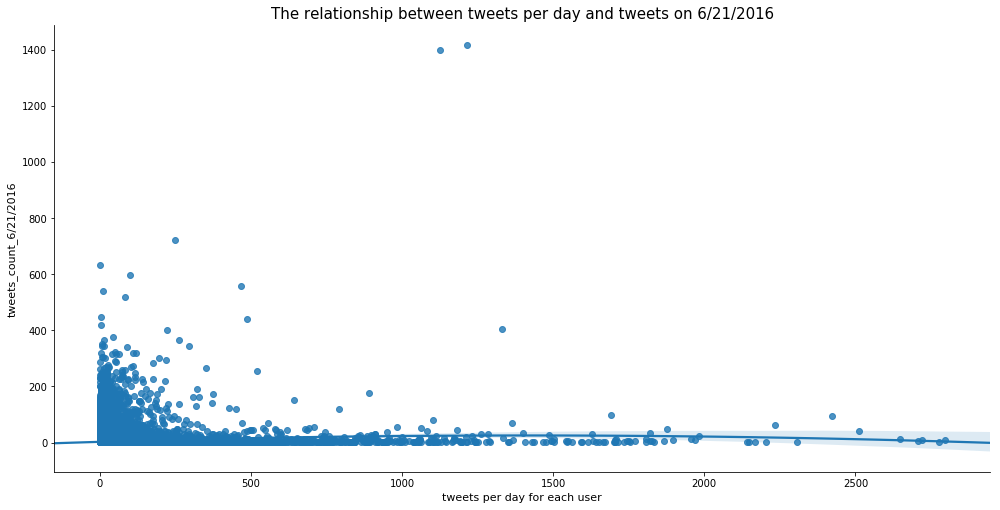

In [19]:
sns.lmplot(x = 'per_twitters', y = 'twitter_count', data = idf, order=2, size = 7, aspect=2)

plt.title('The relationship between tweets per day and tweets on 6/21/2016', fontsize = 15)

plt.xlabel('tweets per day for each user',fontsize=11)
plt.ylabel('tweets_count_6/21/2016', fontsize = 11)


plt.show()

Most people tweeted from 0 to 10 tweets per day, and most of people who tweeted frequently per day didn't tweet lots on the 6/21/2016.

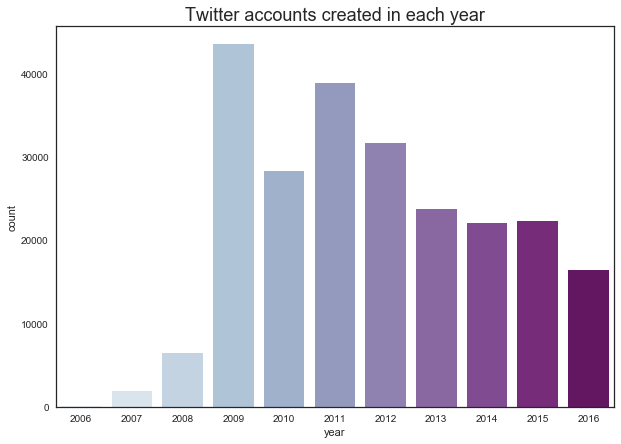

In [20]:
idf['year']= idf['created_at'].apply(lambda x: x.year)
idf['month']= idf['created_at'].apply(lambda x: x.month)
idf['day']= idf['created_at'].apply(lambda x: x.day)

years = idf.year.value_counts().to_frame().reset_index()
years.columns=['year','count']

sns.set(style='white')
plt.figure(figsize=(10,7))
sns.barplot(x= years['year'],y=years['count'], data = years,
                   palette='BuPu')

plt.title('Twitter accounts created in each year', fontsize=18)

plt.show()

Most users created their accounts in 2009, and even though year 2016 only had 6 months at that time, almost 20000 account created in 2016. So I want to explore deeper in months.

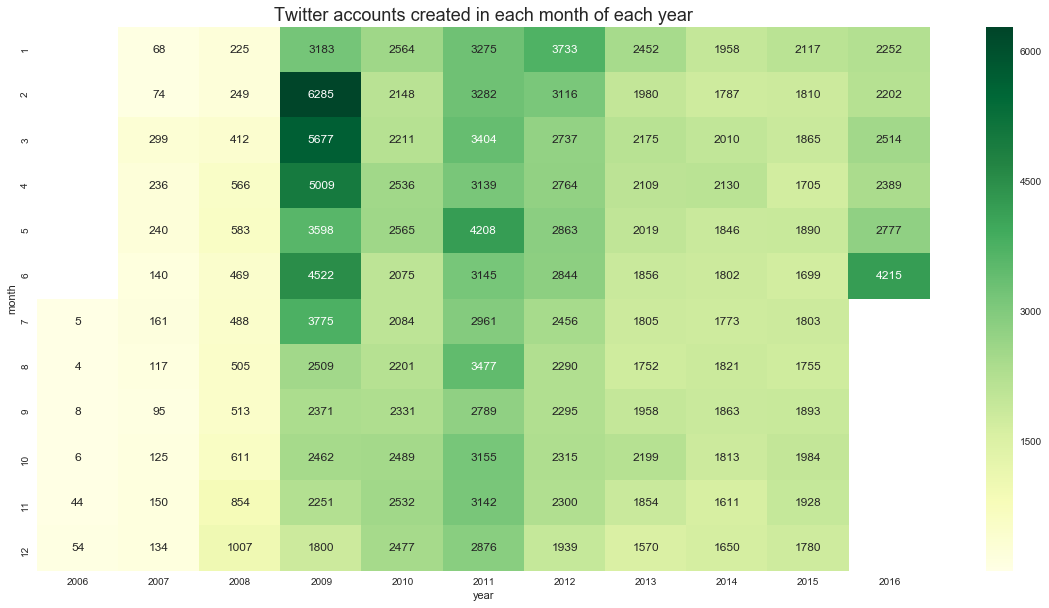

In [21]:
created_count = pd.DataFrame({'count' : idf.groupby(['year', 'month']).size()}).reset_index()


f,ax=plt.subplots(figsize=(20,10))

time_c = created_count.pivot(index='month', columns='year', values='count')
sns.heatmap(time_c, annot=True, fmt='g', cmap='YlGn')

plt.title('Twitter accounts created in each month of each year', fontsize=18)

plt.show()

The heatmap represents the relationship between dates and the number of twitter accounts. The individual values that are contained in the matrix are the number of twitter accounts created in that month of the year. 

What kinds of languages that people used?

what are the top 10 languages for unverified users and verified users?

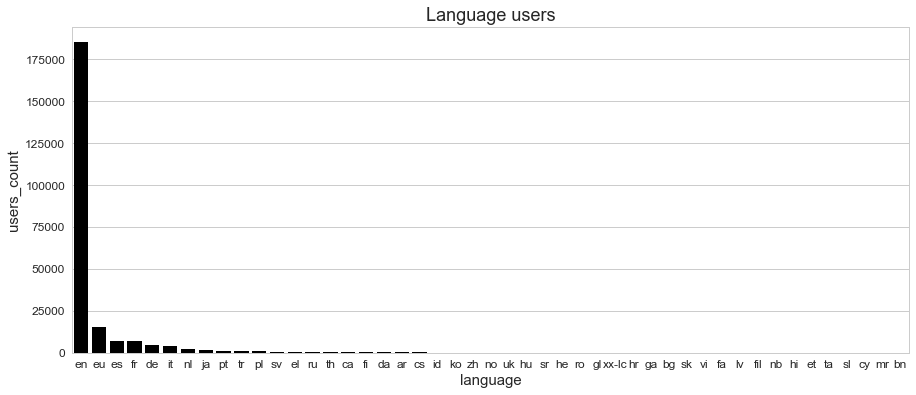

In [22]:
langs = idf.lang.value_counts().to_frame().reset_index()
langs.columns = ['lang', 'count']

sns.set(style='whitegrid')

plt.figure(figsize=(15,6))
# sns.barplot(x=langs['lang'],y=langs['count_x'], data = langs, color = 'black')
# sns.barplot(x=langs['lang'],y=langs['count_y'], data = langs, color = 'yellow')

sns.barplot(x=langs['lang'],y=langs['count'], data = langs, color = 'black')

plt.title('Language users', fontsize = '18')
plt.xlabel(u'language',fontsize=15)
plt.ylabel(u'users_count',fontsize=15)
plt.xticks(size = 12)
plt.yticks(size = 12)

plt.show()

The barchart shows what kinds of languages that people used. English is the most common language, and Spanish, Italian and German Follow.

Where to find full names of abbreviations  https://developer.twitter.com/en/docs/developer-utilities/supported-languages/api-reference/get-help-languages

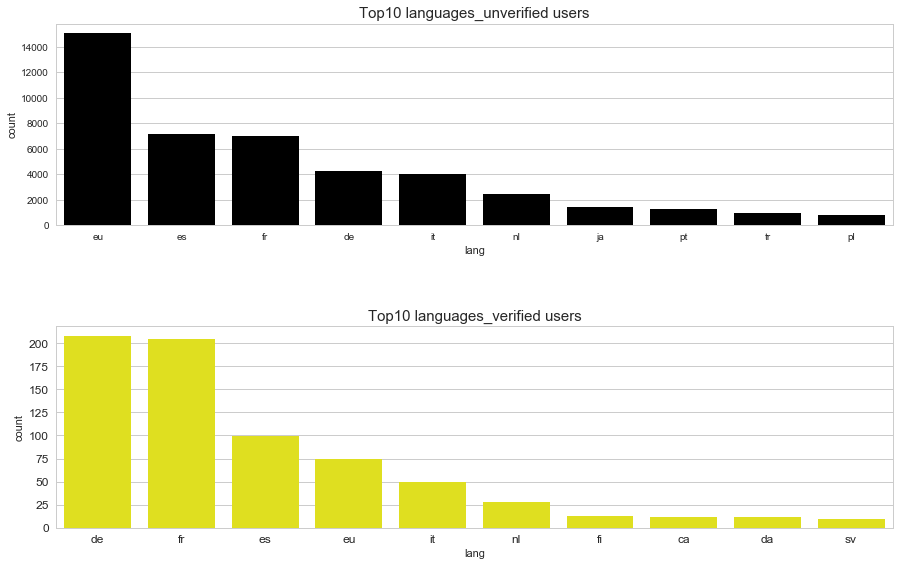

In [24]:
# Get rid of English because users who use English are MUCH MORE that other languages users

lang_nv = df_verified_f.lang.value_counts().to_frame().reset_index()
lang_nv.columns=['lang','count']

lang_v = df_verified_t.lang.value_counts().to_frame().reset_index()
lang_v.columns=['lang','count']

# langs = pd.merge(lang_nv, lang_v, on='lang')
# langs['count_y'] = langs['count_y']*(-1)

lang_nv10 = lang_nv[1:11]
lang_v10 = lang_v[1:11]

sns.set(style='whitegrid')

fig, axes = plt.subplots(2,1, figsize = (15,8))
ax1 = sns.barplot(x=lang_nv10['lang'],y=lang_nv10['count'], data = lang_nv10, color = 'black', ax = axes[0])
ax2 = sns.barplot(x=lang_v10['lang'],y=lang_v10['count'], data = lang_v10, color = 'yellow', ax = axes[1])

ax1.set_title('Top10 languages_unverified users', fontsize = 15)
ax2.set_title('Top10 languages_verified users', fontsize = 15)

plt.xticks(size = 12)
plt.yticks(size = 12)

fig.subplots_adjust(top=1, hspace=0.5)
plt.show()


Excluding English, even though there's a little difference between the orders of top 5 languages in two graphs, German, Franch, Spanish, and Italian are relatively more common for both unverified users and verified users, which could mean that people from Germany and France such countries were more caring about Brexit.

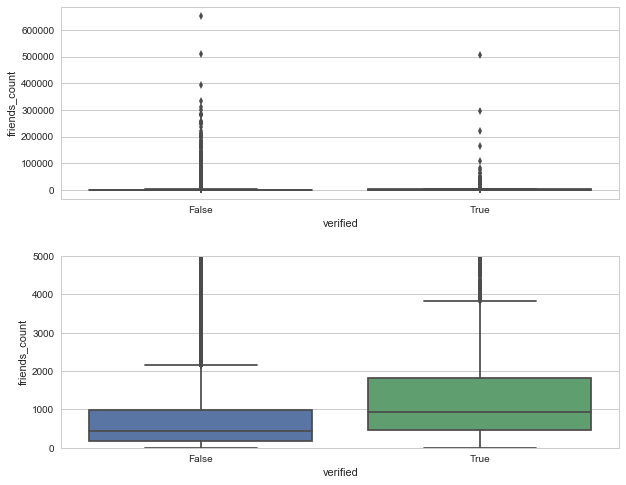

In [25]:
fig, axes = plt.subplots(2,1, figsize = (10,7))
sns.boxplot(x='verified', y='friends_count', data=idf, ax = axes[0])
sns.boxplot(x='verified', y='friends_count', data=idf, ax = axes[1])
axes[1].set_ylim([0, 5000])

fig.subplots_adjust(top=1, hspace=0.3)
plt.show()

These two boxplot are all about the distribution of the number of friends grouped by verified and unverified users.

The first boxplot shows all outliers and the second one is a part of the first boxplot to show the difference in median and inter-quartile range between verified and unverified users, because the boxes are not distinctive.

Excluding outliers, only 25% of unverified users were following over 1000 accounts; 50% of verified users were following over 1000 accounts at that time, but there are more outliers in the group of unverified users than verified users.

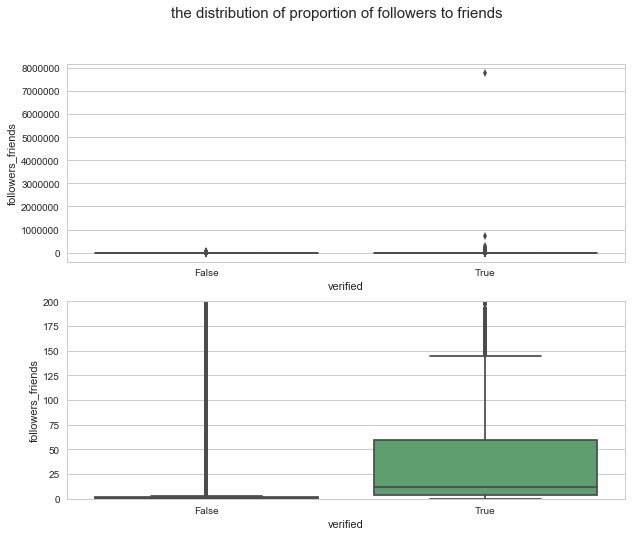

In [26]:
idf['followers_friends'] = idf['followers_count']/(idf['friends_count'])
idf.describe()

fig, axes = plt.subplots(2,1, figsize = (10,8))

sns.boxplot(x='verified', y='followers_friends', data=idf, ax = axes[0])
sns.boxplot(x='verified', y='followers_friends', data=idf, ax = axes[1])
axes[1].set_ylim([0, 200])

plt.suptitle('the distribution of proportion of followers to friends', fontsize=15)
plt.show()

The first boxplot shows all outliers and the second one is a part of the first boxplot to show the difference in median and inter-quartile range between verified and unverified users, because the boxes are not distinctive.

It is easy to find that verified users had more followers than the amount of accounts they were following.

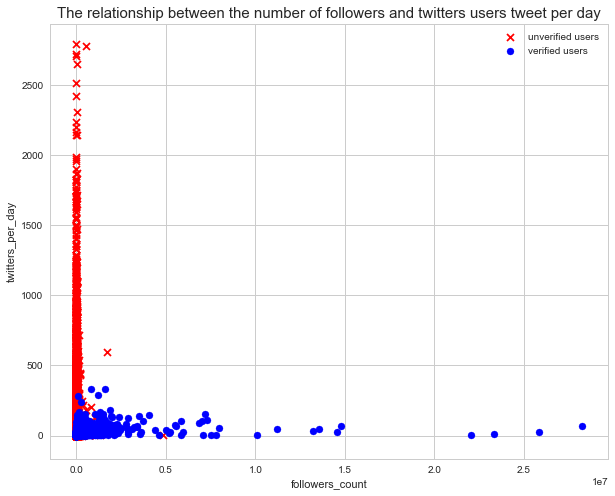

In [27]:
plt.figure(figsize=(10,8))

plt.scatter(x=df_verified_f.followers_count, y=df_verified_f.per_twitters,
           marker='x', color='r', label = 'unverified users')
plt.scatter(x=df_verified_t.followers_count, y=df_verified_t.per_twitters,
            marker='o', color='b', label = 'verified users')


plt.title('The relationship between the number of followers and twitters users tweet per day', fontsize = 15)
plt.xlabel('followers_count')
plt.ylabel('twitters_per_day')
plt.legend(loc='upper right')
plt.show()


There is no distinct relationship between followers_count and the average amount of twitters per day. But we can see that verified users and unverified users are totally different about the two varible. 

Unverified users had less followers but tweeted much more frequently; verified users had relatively more followers while tweeted less every day.

In [28]:
time = pd.DataFrame({'statuses_mean' : idf.groupby(['year', 'month'])['statuses_count'].mean()}).reset_index()
time.head()

,year,month,statuses_mean
0,2006,7,33560.800000
1,2006,8,17079.000000
2,2006,9,38455.000000
3,2006,10,30440.166667
4,2006,11,31015.522727


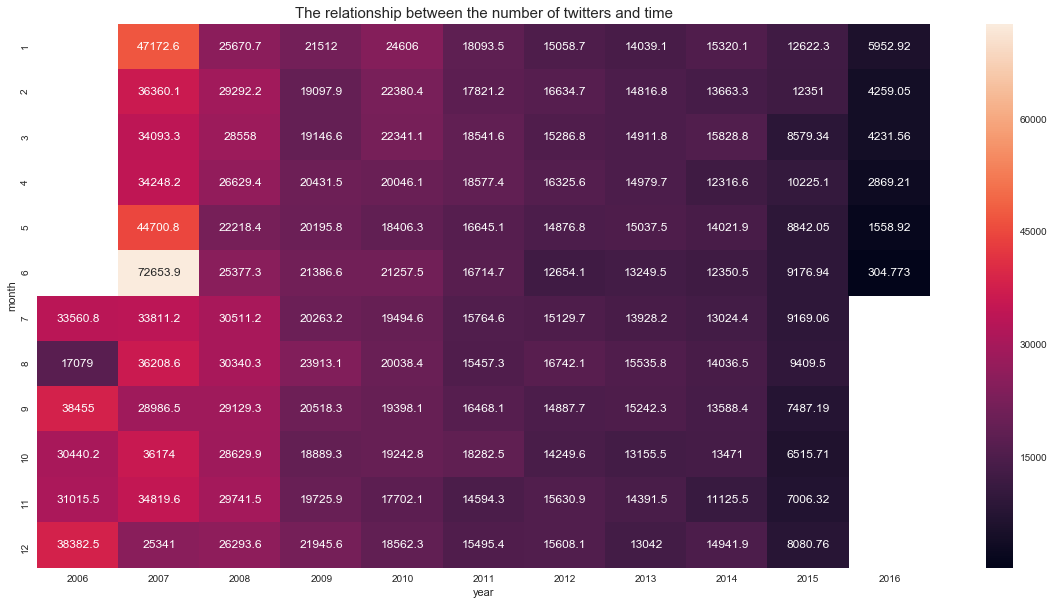

In [29]:
f,ax=plt.subplots(figsize=(20,10))

time_h = time.pivot(index='month', columns='year', values='statuses_mean')
sns.heatmap(time_h, annot=True, fmt="g")

plt.title('The relationship between the number of twitters and time', fontsize = 15)
plt.show()


The individual values that are contained in the matrix are the average amount of total twitter tweeted by users who created their accounts in that month of the year. 
Obviously old accounts had tweeted more than new accounts had tweeted.

# Reflect and Hypothesise

## Reflection

The data we have is massive and the structure of it is very complicated. The original data is about each twitter object and each object has its user account data. some twitters might be tweeted by the same user, so the user data might be duplicated. After dropping duplicated user data and abnormal data, I had 234973 rows of data left, and the original data has 710637 rows.

By dropping data, I collected how many tweets were tweeted by each user on 6/21/2016 and made it a new variable of user data. I also use date information and statuses_count to calculate how many tweets tweeted per day for each user, which can help me to tell if the account is a dead account or a spam account. 

Most of the distribution of varibles are long-tailed, so it's difficult to see nice distribution in this dataset.

I wanted to use location and timezone information to draw a map, to show people from which part of the world were caring about Brexit, but because users are allowed to type anything they want in location information, so there are lots of location that are not locations at all, such as ‘feminist’. And a timezone can cover a large area, which is too ambiguous. I’m wondering maybe I can use the ‘place’ attribution of each tweet, which is created by location service on phone, so it’s more reliable and accurate. In the future study I think we can go deeper about this.


## Hypotheses

#### Lots of people wanted to express their opinion about Brexit. 

The most interesting thing showing in the first heatmap is that there were over 4000 accounts created from 6/1/2016 to 6/21/2016 and the number is more that most other months have in past. I think it reflects that many people were caring about Brexit and they wanted to express their opinions on public social platforms, such as Twitter, so they were lots of new accounts in June, 2016.

I may retrieve tweets that these new users tweeted to find out if they had distinct opinions.

#### Maybe there was something important happening in the first six months of 2009.

From the first heapmap we can also see that lots of accounts were created in the first six months of 2009, which confirms that year 2009 has most accounts created (seen in the bar chart 'Twitter accounts created in each year'). I was wondering if there was something as important as Brexit, or as controversial as Brexit, happend. 

I may try to search and look up other materials to understand it.

#### There may be some spam accounts created by intent because of Brexit.

From the first plot 'The relationship between tweets per day and tweets on 6/21/2016' we can see that most people tweeted from 0 to 10 tweets per day, and most of people who tweeted frequently per day didn't tweet lots on the 6/21/2016. So I guess some accounts were created by intent because it seems impossible to tweet over 400 tweets a day.

I may retrieve tweets that these users who tweeted over 400 tweets a day to find out if they were spam accounts.